# Assignment 2020: Investigating the numpy.random package
***

## The Overall Purpose of the Package
***
The generation of random numbers by computers has many important uses in numerous different real-world contexts. These range from the generation of truly random numbers in the areas of encryption and online gambling, to the ability to generate pseudo random numbers for simluation and modelling applications [1]. In Python programming, the Numpy library provides the `random` [package](https://numpy.org/doc/stable/reference/random/index.html) which allows developers to work with pseudo random numbers.

###### (further investigation)
* Generator and BitGenerator
* default_rng constructor to create instance of Generator
* link between random and probability
* pseudo randomness vs determinism - computers are ultimately deterministic machines

[1] https://dataconomy.com/2017/12/random-data-can-benefit-business/

## The simple random data functions
***

### 1. integers method
Returns random integers from the interval passed. It takes 5 parameters (4 are optional). These are explored below:

Firstly, the numpy library is imported. This provides the full range of tools necessary to fully investigate the package. matplotlib.pyplot is also important for visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Next, the `default_rng()` function is called. This constructs a new Generator, providing access to a range of methods and distributions. 

In [2]:
rng = np.random.default_rng()

##### Parameter 1: *low*
This will be the lowest integer returned. If `high=None`, the integer passed is used as the *high* value and *low* is 0

In [3]:
# Generate one random integer between 0 and 10 exclusive
rng.integers(low=10)

5

In [4]:
# Generate array of inetegers with 3 different lower bounds
rng.integers([1, 3, 8], 10)

array([2, 3, 9], dtype=int64)

##### Parameter 2: high
This int value is the upper endpoint of the interval passed. Unless `endpoint=True`, the value for *high* will be excluded from the returned integers

In [5]:
# Generate one random integer between 1 and 10 exclusive
rng.integers(low=1, high=10)

7

In [6]:
# Generate array of inetegers with 5 different upper bounds exclusive
rng.integers(1, [2, 5, 10, 8, 9])

array([1, 1, 4, 1, 4], dtype=int64)

##### Parameter 3: size
The *size* parameter determines the shape of the array of integers returned. It takes int values or tuples of int values

In [7]:
# Generate a 1d array with 2 values between 1 and 10 exclusive
rng.integers(low=1, high=10, size=(2))

array([3, 8], dtype=int64)

In [8]:
# Generate a 2d array of 2 rows and 3 columns with values between 1 and 10 exclusive
rng.integers(1, 10, (2, 3))

array([[9, 5, 3],
       [6, 4, 9]], dtype=int64)

In [9]:
# Generate a 3d array with values between 1 and 10 exclusive
rng.integers(1, 10, (2, 3, 4))

array([[[4, 5, 1, 9],
        [6, 1, 8, 6],
        [8, 5, 8, 5]],

       [[2, 6, 2, 6],
        [8, 6, 8, 7],
        [3, 9, 1, 9]]], dtype=int64)

##### Parameter 4: dtype
Specifies the desired datatype of the result. The dtype must be supported for integers.

In [10]:
# Generate a 2d array of boolean values between 0 and 2 , exclusive
rng.integers(0, 2, (2, 3), dtype=np.bool_)

array([[ True,  True, False],
       [False, False, False]])

In [11]:
# Generate a 2d array of 32-bit unsigned integer values (0 to 4294967295)
rng.integers(1, 10, (2, 3), dtype=np.uint32)

array([[8, 5, 8],
       [1, 3, 6]], dtype=uint32)

In [12]:
# Generate a 2d array of 8-bit unsigned integer values (0 to 255)
rng.integers(1, 256, (2, 3), dtype=np.uint8)

array([[ 87, 174, 219],
       [170,  64, 232]], dtype=uint8)

##### Parameter 5: endpoint
Determines the upper enpoint of the interval. If endpoint=True, result is *high* inclusive. If endpoint=False, *high* is excluded from result. Default is False.

In [13]:
# Returns integers between 1 and 10, inclusive
rng.integers(1, 10, 10, endpoint=True)

array([10,  1,  6,  7,  4,  6,  9,  1,  9,  3], dtype=int64)

### 2. random method
Returns random floating point values in the half-open interval [0.0, 1.0)

In [14]:
# Generate a floating point number bewteen 0.0 and 1.0
rng.random()

0.8158524984693487

##### Parameter 1: size
Determines the shape of the array returned. Takes ints or tuples of ints.

In [15]:
# Generate a 1d array of 5 values between 0.0 and 1.0
rng.random(5)

array([0.98729397, 0.1573537 , 0.65385886, 0.77450196, 0.10402916])

In [16]:
# Three-by-two array of random numbers between 0.0 and 1.0
rng.random((5, 2))

array([[0.6401153 , 0.20215543],
       [0.72835616, 0.57767754],
       [0.04634873, 0.66722837],
       [0.12614335, 0.61591055],
       [0.17474622, 0.85781414]])

##### Parameter 2: dtype
Specifies the desired datatype of the result.

In [17]:
##### Generate 2d array of 32-bit float values
rng.random((5, 2), dtype=np.float32)

array([[0.37952006, 0.7866831 ],
       [0.64441323, 0.7183391 ],
       [0.3854518 , 0.35349035],
       [0.950168  , 0.99763966],
       [0.16658342, 0.04472959]], dtype=float32)

##### Parameter 3: out
Alternative array in which to put result

In [18]:
rng.random((5, 2), out=None)

array([[0.34691458, 0.14058763],
       [0.45609183, 0.37757848],
       [0.4408221 , 0.57952921],
       [0.36254227, 0.32969565],
       [0.27907305, 0.93835545]])

We can generate random floating point values outside of the interval [0.0, 1.0] using simple arithmetic: `(b-a) * random() + a`

In [19]:
# Generate four-by-three array of floating point values between 5 and 10
a = 5
b = 10

(b - a) * rng.random((4, 3)) + a

array([[7.37278215, 6.88982796, 9.53445967],
       [8.42749527, 8.90408974, 5.76292717],
       [9.94020954, 8.15964658, 5.11975014],
       [8.11852752, 7.97898451, 8.60463435]])

### 3. choice method
Generates a random sample from a given 1d array

##### Parameter 1: a
Takes either a ndarray or an int. A random sample is generated from the elements in the array or if a=*int*, it is generated from np.arange(a)

In [20]:
# Generate random sample with int. This is generated from the np.arange() method
rng.choice(a=5)

2

In [21]:
# Generate random sample from array
rng.choice([2, 5, 7, 8])

8

##### Parameter 2: size
Determines the shape of the output. *size* can take an int or a tuple of ints

In [22]:
# Generate array with 3 elements from array passed
rng.choice(['two', 'five', 'seven', 'eight'], size=3)

array(['seven', 'eight', 'eight'], dtype='<U5')

In [23]:
# Generate a three-by-two array of random integers from array passed
rng.choice([2, 5, 7, 8], size=(3, 2))

array([[2, 8],
       [8, 8],
       [5, 5]])

In [24]:
# Generate array with 100 elements from randomly generated array

# Generate random array of integers
rand_arr = rng.integers(2, 50, 100)

rng.choice(rand_arr, len(rand_arr))
rand_arr

array([34, 25,  3, 36, 22, 48, 43, 45,  5, 30, 42, 18, 12, 18, 38, 40, 17,
       10, 39, 34, 31, 29, 37, 42,  2, 20, 30,  9, 35, 42,  8, 18, 38, 36,
       11, 22, 12, 48, 11,  3, 45, 36,  3, 34, 28,  7,  2,  9, 49, 46, 43,
        5, 19, 14, 48,  7, 13, 12, 42,  9, 47,  2, 27, 36, 49,  5, 31,  8,
        2, 28,  2, 28, 20, 31, 40, 18, 20, 41, 36, 46, 17, 12, 20, 41, 23,
       29, 21, 25,  3, 34, 45, 42, 49, 23,  8, 23, 42, 18, 37, 15],
      dtype=int64)

##### Parameter 3: replace
If `replace=False` elements from the array passed are not replaced in the output array

In [25]:
# Generate array without replacement
rng.choice([2, 5, 7, 8], size=(4), replace=False)

array([8, 2, 5, 7])

##### Parameter 4: p
Assigns the probabilities associated with each element of *a*. *p* values must add up to 1

(array([1955.,    0.,    0.,    0.,    0., 4939.,    0.,    0., 2050.,
        1056.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

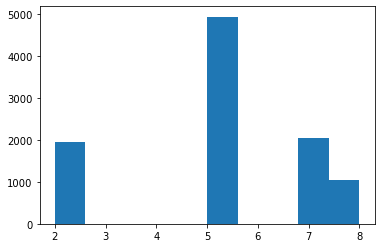

In [26]:
# Generate array with probablities assigned to each element
prob = rng.choice([2, 5, 7, 8], size=(10000), p=[0.2, 0.5, 0.2, 0.1])

# Plot this on a histogram to visualize results
plt.hist(prob)

##### Parameter 5: axis
Selects the array axis to generate from 

In [27]:
# Generate array of random integers when axis=0
rng.choice(([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]), axis=0)

array([ 9, 10, 11, 12])

In [28]:
# Generate array of random integers when axis=1
rng.choice(([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]), axis=1)

array([1, 5, 9])

### 4. bytes method
Returns random bytes

##### Parameter: length
Specifies number of bytes to be generated

In [29]:
# Generate 100 random bytes
np.random.default_rng().bytes(100)

b'SZ\xb5\xd2\x10\xc1\x0f\xf1\xdaRm\xde\xa2\x01\x9euf\x804\x01\xc8\xef\xf8%\x06R\xafB\x1b3\x8c\xcb{\x1d"\x16\x9b\x87\x91Z\xa7\r\x90jO\xa8E\xc4\xe9\x81\x93\xd5\x9e!\x7f\xb6\xf0\x03\xca_\x8e\x184{^\xa6\xbc\x02P\xc3\x8b+{\x19(%\xa3u\xf7\xd7:C\xa06\xa6|"2\xe5O\xf2\xfb\xbd\x1c`p\x89v\xcb~'

## Permutations
***

### 1. Shuffle
Shuffles contents of array-like objects passed. The order is changed but the contents remain the same.

##### Parameter 1: x
Takes a ndarray for content shuffle

In [30]:
# Generate array of random integers from 1-9
arr = rng.integers(1, 10, 10)

# Call the shuffle method
rng.shuffle(arr)

# Output shuffled array
arr

array([7, 3, 8, 7, 7, 9, 5, 4, 8, 4], dtype=int64)

##### Parameter 2: axis
Selects the array axis on which to shuffle

In [31]:
# Generate 3d array of random inetegers and assign to variable arr1
arr1 = rng.integers(1, 10, (2, 3, 4))

# Pass array to shuffle method and set axis to 1
rng.shuffle(arr1, axis=1)

# Output shuffled array 
arr1

array([[[3, 9, 7, 4],
        [2, 6, 7, 9],
        [5, 7, 2, 9]],

       [[2, 3, 1, 1],
        [9, 3, 1, 2],
        [6, 7, 7, 6]]], dtype=int64)

### 2. Permutation
Randomly permutes a sequence

##### Parameter 1: x
Takes an int or array

In [32]:
# When x is an int, np.arange(x) is randomly permuted
rng.permutation(x=10)

array([7, 0, 1, 6, 3, 5, 8, 9, 2, 4])

In [33]:
# When x is an array, a shuffled copy of x is returned
arr = rng.integers(1, 10, (2, 3, 4))

rng.permutation(arr)

array([[[5, 9, 1, 1],
        [2, 2, 5, 8],
        [3, 8, 6, 7]],

       [[5, 4, 3, 6],
        [5, 2, 7, 3],
        [7, 2, 7, 6]]], dtype=int64)

##### Parameter 2: axis
Selects the array axis on which to shuffle

In [34]:
arr = rng.integers(1, 10, (2, 3, 4))

# Set axis=1
rng.permutation(arr, axis=1)

array([[[3, 5, 2, 9],
        [9, 1, 8, 5],
        [9, 5, 1, 2]],

       [[4, 4, 5, 4],
        [1, 8, 4, 4],
        [3, 3, 9, 6]]], dtype=int64)

## Distributions
***

### 1. Normal
***
The normal distribution, also known as the Gaussian distribution or bell curve, is a continuous probability distribution which is often considered to be the most important in the field of statistics because of the frequency of its occurrence in the natural world [1]. This explains why it is often used to model random variables. The probability density function (pdf) of the normal distribution is expressed as:

$$ p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})}$$

where $\mu$ (mu) is the mean or median and $\sigma$ (sigma) is the standard deviation. The pdf gives the height of the curve at point $x$ [2]. A random variable has an increasing probability of being generated the closer its value to the mean. More specifically, in normal distributions, approximately 68% of the data falls within one standard deviation of the the mean, 95% within 2 standard deviations and 99.7% within 3 standard deviations. [3]

Using the numpy.random package, we can draw random samples from a normal distribution through the random.Generator.normal method. The desired mean and standard deviation are passed as parameters to the function and a specified number of samples are derived. 

**References** <br>
[1] Frost, Jim; Normal Distribution in Statistics;	https://statisticsbyjim.com/basics/normal-distribution/ <br>
[2] JB Statistics; An Introduction to the Normal Distribution; https://www.youtube.com/watch?v=iYiOVISWXS4 <br>
[3] Python for Data 22: Probability Distributions https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions <br>

In [35]:
# Return a single sample value from a normally distributed variable with mean=5 and standard deviation=3
rng.normal(loc=5, scale=3)

7.339079382586069

In [36]:
# Return a 1d array of 50 values of a normally distributed random variable with mean=5 and standard deviation=3
norm = rng.normal(loc=5, scale=3, size=50)
norm

array([ 2.94902554,  3.90936443,  5.56116299,  5.17103213,  4.34907578,
       10.48251086,  2.24893769,  1.79834562,  6.18570568,  5.44726914,
        5.56763676, 10.99415121,  9.09477084,  3.8435472 ,  4.14346314,
        1.50184124,  2.36321294,  7.10539673,  5.68322399,  3.80264396,
        5.54075282,  6.51610988,  9.2672442 ,  7.04163317,  4.05857811,
        5.9951193 ,  5.48999171,  9.12726395, -1.67996969,  5.44270707,
       -0.65921969,  3.37374897,  6.2362225 ,  1.83491402,  2.17460589,
        5.02130695, -1.89172405,  1.90139455,  1.69906702,  8.16732808,
        5.90143088, -0.63620615,  2.22998864,  3.30560827,  9.88625506,
       -0.42653894,  2.3129241 ,  0.06746284,  2.96095192,  2.64632706])

(array([4., 2., 5., 8., 8., 9., 7., 1., 3., 3.]),
 array([-1.89172405, -0.60313653,  0.685451  ,  1.97403852,  3.26262605,
         4.55121358,  5.8398011 ,  7.12838863,  8.41697616,  9.70556368,
        10.99415121]),
 <a list of 10 Patch objects>)

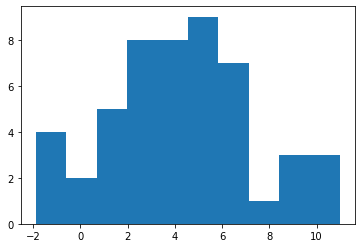

In [37]:
# Plot the distribution using a histogram
plt.hist(norm)

(array([  11.,   98.,  620., 1768., 2946., 2762., 1355.,  373.,   62.,
           5.]),
 array([-6.53891211, -4.15942755, -1.77994299,  0.59954157,  2.97902613,
         5.35851069,  7.73799525, 10.11747981, 12.49696437, 14.87644893,
        17.25593349]),
 <a list of 10 Patch objects>)

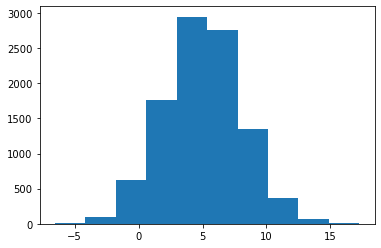

In [38]:
# The more samples we plot, the more the histogram resembles the 
# classic symmetric shape associated with normal distribution
norm1 = rng.normal(loc=5, scale=3, size=10000)
plt.hist(norm1)

In [39]:
# We would expect the mean of the distribution to be close to the value assigned (5)
np.mean(norm1)

5.002172642405346

In [40]:
# We would expect the standard deviation to be close to value assigned (3)
np.std(norm1)

3.014949461503838

***
A standard normal distribution has a mean of 0 and standard deviation of 1. The standard normal distribution is explored below with the associated density function

In [41]:
# Draw samples from a standard normal distribution
mu, sigma = 0, 1

norm2 = np.random.default_rng().normal(mu, sigma, 10000)

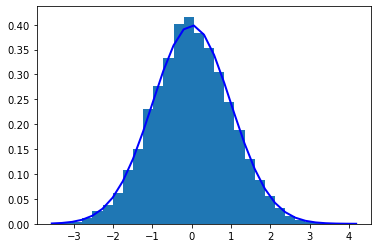

In [42]:
# Taken from the numpy.random documentation, use matplotlib to plot the
# probability density function for a standard normal distribution
count, bins, ignored = plt.hist(norm2, 30, density=True)

# The probability density function is coded out and passed
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='b')

plt.show()

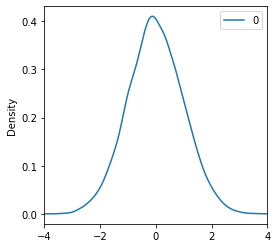

In [43]:
# Plot density function using Pandas
pd.DataFrame(norm2).plot(kind="density", figsize=(4,4), xlim=(-4, 4))

The standard deviation (sigma) determines the width of the curve. The lower the std, the higher the probability of the random variable being closer to the mean. We can visualise the affect of lowering or raising the value of sigma when we plot the distributions on plots of equal dimension. [4]

[4] *code take from:* Lecture 18;  https://www.math.uci.edu/~isik/teaching/17W_MATH9/notes/Lecture18.html

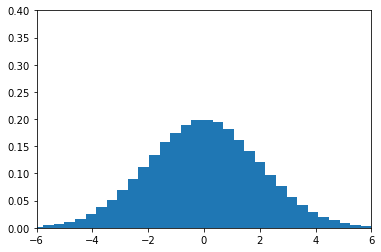

In [44]:
# With a mean of 0 and standard deviation of 2
N = 500000
mu = 0.0
sigma = 2.0 
norm3 = np.random.default_rng().normal(mu, sigma, size=N)
plt.axis([-6, 6, 0, 0.40])
_,_,_ = plt.hist(norm3, 50, density=True)

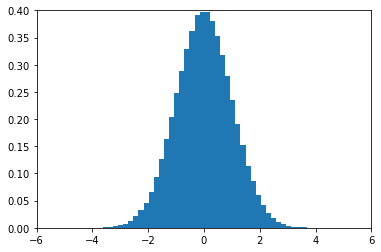

In [45]:
# Lowering the standard deviation we can see the curve narrows 
N = 500000
mu = 0.0
sigma = 1.0 # lower standard deviation
norm4 = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.40])
_,_,_ = plt.hist(norm4, 50, density=True)

### 2. Uniform
***
The `.uniform` function outputs an array of values which are evenly distributed across the interval passed. Each value has an equal chance of being generated. Values outside of the interval never occur and thus have a probability of 0. The probability density function is: $$ p(x) = \frac{1}{b-a}$$

*coin toss example*

In [46]:
# Generate an array of random variables in a uniform distribution
uni = np.random.default_rng().uniform(-10,5,10000)

(array([1050., 1009.,  988.,  949., 1014., 1034.,  944.,  995., 1043.,
         974.]),
 array([-9.99729895, -8.49768268, -6.99806641, -5.49845014, -3.99883386,
        -2.49921759, -0.99960132,  0.50001495,  1.99963122,  3.49924749,
         4.99886376]),
 <a list of 10 Patch objects>)

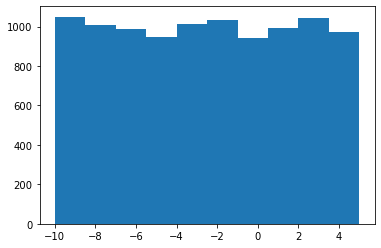

In [47]:
# Plot the distribution using a histogram
plt.hist(uni)

In [48]:
np.mean(uni)

-2.531012076867529

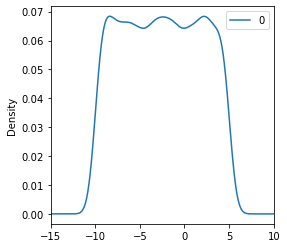

In [49]:
# Plot the density function using Pandas library
pd.DataFrame(uni).plot(kind="density", figsize=(4,4), xlim=(-15, 10))